In [1]:
!uname -a

Linux 33c9c2e04395 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux


# Основы работы с TensorFlow

In [3]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Создание переменных и выполнение операций.

In [4]:
a = tf.Variable(1.)

In [5]:
b = tf.Variable(2.)

In [6]:
a+b

<tf.Tensor 'add:0' shape=() dtype=float32>

In [13]:
s = tf.Session()

In [14]:
s.run(tf.global_variables_initializer())

In [15]:
s.run(a+b)

3.0

In [16]:
s.close()

## Решение задач оптимизации (поиск минимума).

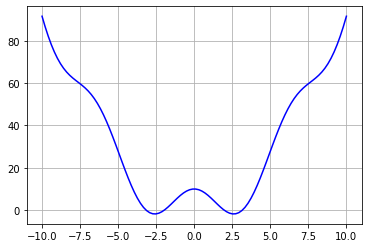

In [87]:
xs = np.linspace(-10, 10, 100)
ys = np.power(xs, 2) + 10*np.cos(xs)

plt.plot(xs, ys, c='b')
plt.grid(True)
plt.show()

In [102]:
t_xs = tf.Variable([10.])
t_ys = tf.pow(t_xs, 2) + 10*tf.cos(t_xs)

In [111]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [112]:
step = optimizer.minimize(t_ys)

In [115]:
x_r, y_r = [], []
s = tf.Session()
s.run(tf.global_variables_initializer())

for i in range(1000):
  _, x, y = s.run([step, t_xs, t_ys])
  if i%100==0:
    print(x, y)
    x_r.append(x)
    y_r.append(y)

s.close()

[9.97456] [91.60928]
[8.461271] [65.96344]
[7.7914915] [61.36329]
[7.2189317] [58.085712]
[6.365152] [50.62179]
[4.6939044] [22.224913]
[3.288576] [0.9883976]
[2.8173428] [-1.5353785]
[2.6700373] [-1.7788825]
[2.6211743] [-1.8054833]


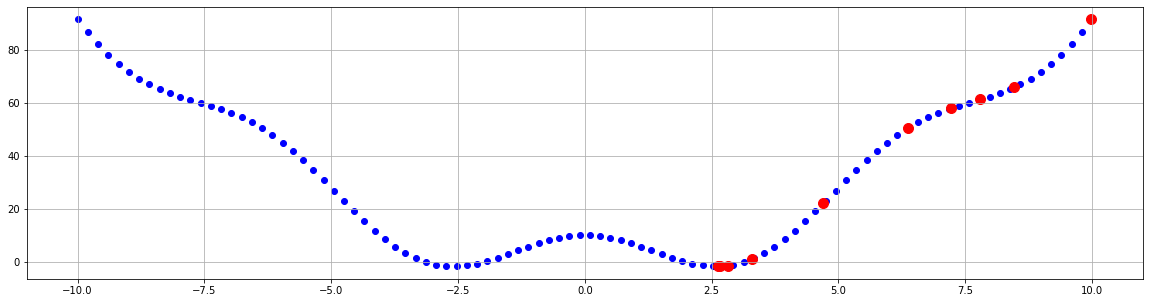

In [120]:
plt.figure(figsize=(20,5))
plt.scatter(xs, ys, c='b')
plt.scatter(x_r, y_r, c='r', s=100)
plt.grid(True)
plt.show()

На рисунке показаны промежуточные значения поиска минимума.

## Построение линейной регрессии.

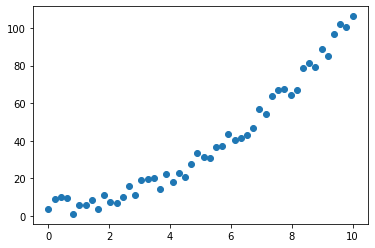

In [123]:
xs = np.linspace(0, 10, 50)
ys = xs**2 + np.random.random(50)*10
plt.scatter(xs, ys)
plt.show()

In [124]:
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

In [125]:
X

<tf.Tensor 'Placeholder_3:0' shape=<unknown> dtype=float32>

In [126]:
def model(X,w):
  return tf.multiply(X,w)

In [127]:
w = tf.Variable([0.], dtype=tf.float32)

In [128]:
y_model = model(X,w)

In [129]:
loss = tf.sqrt(tf.reduce_sum(tf.pow(tf.subtract(y_model, Y), 2)))

In [130]:
optimizer = tf.train.RMSPropOptimizer(0.01)
step = optimizer.minimize(loss)

In [131]:
s = tf.Session()
s.run(tf.global_variables_initializer())

for epoch in range(1000):
  s.run(step, feed_dict={X:xs, Y:ys})

result = s.run(w)

print(result)
s.close()

[8.370406]


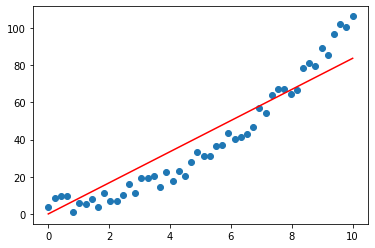

In [132]:
plt.scatter(xs, ys)
plt.plot(xs, xs*result[0], c='r')
plt.show()